### HOG and Raw Input Feature extraction using SVM classifier for digit classification dataset 

## Step 1: Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
import pandas.util.testing as tm

## Mount the Google Drive to access the Digit MNIST Dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Step 2: Data Set Preparation


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

**Utility function to load the data set into train and test**

In [5]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/Assignment/Data/digit', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/Assignment/Data/digit', kind='t10k')

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
#Normalisation and scaling
#Normalisation
X_train =X_train/255.0
X_test = X_test/255.0

#Scaling
X_train = scale(X_train)
X_test = scale (X_test)


### Step 3: Reshaping features for HOG feature Extraction

In [7]:
#Reshaping the Data to 28x28 for HOG Features 
X_train_R=X_train.reshape(-1,28,28)
X_test_R=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train_R)))
print("Test dataset after reshaping :{}".format(np.shape(X_test_R)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


[3]
[0]
[5]
[4]


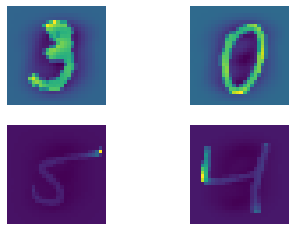

In [0]:
# Visualization of Sample images from Data set 

img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train_R[img_index])
print([y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train_R[img_index])
print([y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 1970
ax2.imshow(X_train_R[img_index])
print([y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 2
ax2.imshow(X_train_R[img_index])
print([y_train[img_index]])


### Step 4: HOG Feature extraction 

In [8]:
#HOG Feature extraction for Train Dataset

feature_vect_train=[]
label_train=[]
# loop over the training images
for img_index in range(len(X_train_R)):
  # load the image, and extract HOG features it
  img = X_train_R[img_index]
  f =  feature.hog(img, orientations =9, pixels_per_cell=(7,7), cells_per_block=(2,2), block_norm="L2-Hys")
  feature_vect_train.append(f)
  label_train.append(y_train[img_index])

print(np.shape(X_train_R))
print(np.shape(feature_vect_train))
print(np.shape(label_train))

(60000, 28, 28)
(60000, 324)
(60000,)


In [9]:
#HOG Feature extraction for Test Dataset
feature_vect_test=[]
label_test=[]
# loop over the training images
for img_index in range(len(X_test_R)):
  # load the image, and extract HOG features it
  img = X_test_R[img_index]
  f2 =  feature.hog(img, orientations =9, pixels_per_cell=(7,7), cells_per_block=(2,2), block_norm="L2-Hys")
  feature_vect_test.append(f2)
  label_test.append(y_test[img_index])

print(np.shape(X_test_R))
print(np.shape(feature_vect_test))
print(np.shape(label_test))

(10000, 28, 28)
(10000, 324)
(10000,)


## Kernel Evaluation

In [0]:
#Identifying ideal kernel for the data 
#Linear kernel
#Train set Accuracy for Linear = 0.98

model_linear=svm.SVC(kernel='linear')
model_linear.fit(X_train,y_train)
print("Train set Accuracy: {:.2f}".format(model_linear.score(X_train,y_train)))

In [0]:
#Identifying ideal kernel for the data 
#RBF Kernel 
##Train set Accuracy for rbf = 0.99

model_rbf=svm.SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)
print("Train set Accuracy: {:.2f}".format(model_rbf.score(X_train,y_train)))

Train set Accuracy: 0.99


## Parameter Optimization using GridSearchCV

## Evaluating different values for parameter regularization (c)

In [0]:
#GridSearchCV
parameters = {"C":[0.1,1,100]}
grid = GridSearchCV(SVC(), parameters)


In [0]:
# Accuracy for SVC c=0.100000 is 94.08%
# Accuracy for SVC c=10.000000 is 99.94%
#Accuracy for SVC c=100.000000 is 100.00%
C_vals = [0.1, 10, 100]
accuracies_cSVC = []
#loop over kvals
for c in  C_vals:
    #train the classifier with various c values 
    model1 = svm.SVC(kernel= 'rbf', C=c).fit(X_train,y_train)

    #evaluate the model and print the accuracies list
    score1 = model1.score(X_train,y_train)
    print("Accuracy for SVC c=%f is %.2f%%" %(c, score1 * 100))
    accuracies_cSVC.append(score1)


Accuracy for SVC c=0.100000 is 94.08%
Accuracy for SVC c=10.000000 is 99.94%
Accuracy for SVC c=100.000000 is 100.00%


c=100.000000 acheived highest accuracy of 100.00%


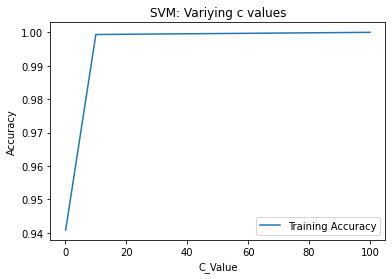

In [0]:
# Determining value of c for highest accuracy

i = np.argmax(accuracies_cSVC)
print("c=%f acheived highest accuracy of %.2f%%" %(C_vals[i], accuracies_cSVC[i] * 100))
plt.title('SVM: Variying c values')
plt.plot(C_vals, accuracies_cSVC, label= "Training Accuracy")
plt.legend()
plt.xlabel('C_Value')
plt.ylabel('Accuracy')
plt.show()


### Model with C=100 and kernel='rbf'

In [0]:
# Model with C = 100 and Kernel as rbf
#Accuracy on the test dataset Raw Input: 97.16
#Accuracy on the test dataset HOG Input: 97.72

#Raw Input to SVM
model_R= svm.SVC(kernel='rbf', C=100 , random_state=42)
model_R.fit(X_train,y_train)
y_pred_R = model_R.predict(X_test)

accuracy_R = metrics.accuracy_score(y_test, y_pred_R)
print("Accuracy on the test dataset Raw Input:", accuracy_R *100)

#HOG Input to SVM
model_HOG= model_R= svm.SVC(kernel='rbf', C=100 , random_state=42)
model_HOG.fit(feature_vect_train,label_train)
y_pred_HOG = model_HOG.predict(feature_vect_test)

accuracy_HOG = metrics.accuracy_score(label_test, y_pred_HOG)
print("Accuracy on the test dataset HOG Input:", accuracy_HOG *100)

Accuracy on the test dataset Raw Input: 97.16
Accuracy on the test dataset HOG Input: 97.72


### Step 6: Building model with passing training setdata and predicting accuracies

In [10]:
# Model with C = 10 and Kernel as rbf
# Final Model for output
#Accuracy on the test dataset Raw Input: 97.19
#Accuracy on the test dataset HOG Input: 97.78

#Raw Input to SVM
model_R= svm.SVC(kernel='rbf', C=10 , random_state=42)
model_R.fit(X_train,y_train)
y_pred_R = model_R.predict(X_test)
print("Train set Accuracy: {:.2f}".format(model_R.score(X_train,y_train)))

accuracy_R = metrics.accuracy_score(y_test, y_pred_R)
print("Accuracy on the test dataset Raw Input:", accuracy_R *100)

#HOG Input to SVM
model_HOG= svm.SVC(kernel='rbf', C=10 , random_state=42)
model_HOG.fit(feature_vect_train,label_train)
y_pred_HOG = model_HOG.predict(feature_vect_test)
print("Train set Accuracy: {:.2f}".format(model_HOG.score(feature_vect_train,label_train)))

accuracy_HOG = metrics.accuracy_score(label_test, y_pred_HOG)
print("Accuracy on the test dataset HOG Input:", accuracy_HOG *100)

Train set Accuracy: 1.00
Accuracy on the test dataset Raw Input: 97.19
Train set Accuracy: 1.00
Accuracy on the test dataset HOG Input: 97.78999999999999


### Step 7:Plotting Confusion matrix for both Raw Input and HOG Input

[[ 966    0    2    3    1    2    3    2    1    0]
 [   0 1128    3    0    0    1    2    1    0    0]
 [   5    3 1001    1    1    0    1   13    6    1]
 [   0    0    5  983    1    7    0    8    5    1]
 [   0    0   11    0  950    1    3    7    1    9]
 [   2    0    2    7    3  862    5    5    4    2]
 [   5    2    0    0    4    7  932    6    2    0]
 [   0    5   10    2    1    1    0 1001    0    8]
 [   2    0    6    6    5    7    0   10  934    4]
 [   1    5    4    8   10    3    0   14    2  962]]


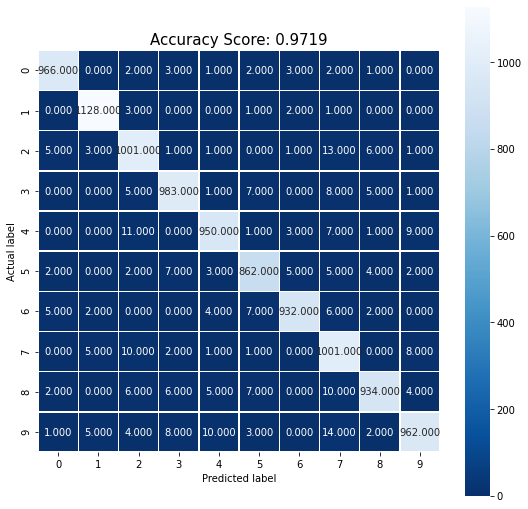

In [0]:
# confusion matrix for Raw Input

cm  = metrics.confusion_matrix(y_test, y_pred_R)
print(cm)

# Ploting confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_R)
plt.title(all_sample_title, size = 15);

[[ 971    0    1    1    0    2    4    0    1    0]
 [   0 1122    3    1    0    0    5    2    2    0]
 [   2    2 1013    2    1    0    2    7    3    0]
 [   0    1    2  990    0    6    1    1    8    1]
 [   0    1    7    0  958    1    0    2    1   12]
 [   0    1    0   10    0  878    2    0    1    0]
 [   6    3    1    1    2    1  939    0    5    0]
 [   0    3    7    8    6    1    0  997    1    5]
 [   4    2    6    6    1    3    1    2  944    5]
 [   1    3    2    4   12    4    0   13    3  967]]


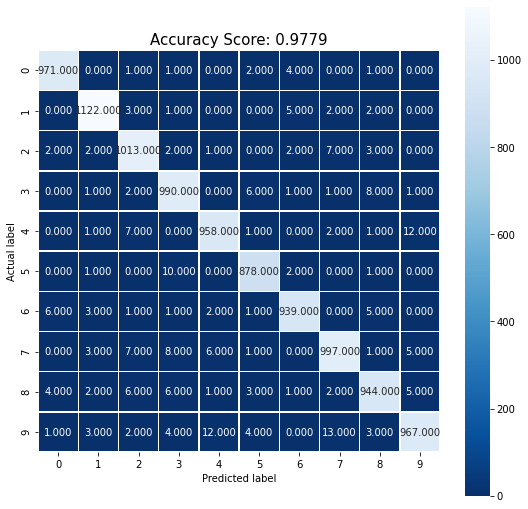

In [0]:
# confusion matrix for HOG Input

cm_HOG  = metrics.confusion_matrix(label_test, y_pred_HOG)
print(cm_HOG)

# Ploting confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm_HOG, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_HOG)
plt.title(all_sample_title, size = 15);


### Step 7: Visualization of results

The Label for output image in Test set: 3
Predicted output for RAW: 3
Predicted output for HOG: 8
The Label for output image in Test set: 9
Predicted output for RAW: 9
Predicted output for HOG: 9
The Label for output image in Test set: 1
Predicted output for RAW: 1
Predicted output for HOG: 1


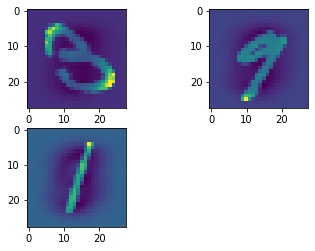

In [30]:
fig = plt.figure()

image_index = 18
ax1 = fig.add_subplot(2,2,1)
plt.imshow(X_test_R[18])
print("The Label for output image in Test set:",y_test[image_index])
print("Predicted output for RAW:",y_pred_R[18])
print("Predicted output for HOG:",y_pred_HOG[18])

image_index = 20
ax2 = fig.add_subplot(2,2,2)
plt.imshow(X_test_R[20])
print("The Label for output image in Test set:",y_test[image_index])
print("Predicted output for RAW:",y_pred_R[20])
print("Predicted output for HOG:",y_pred_HOG[20])

image_index = 2
ax2 = fig.add_subplot(2,2,3)
plt.imshow(X_test_R[2])
print("The Label for output image in Test set:",y_test[image_index])
print("Predicted output for RAW:",y_pred_R[2])
print("Predicted output for HOG:",y_pred_HOG[2])
